In [2]:
import config
import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import glob
from pyspark.sql.functions import lit,unix_timestamp
from pyspark import SQLContext
from pyspark.sql import functions as F
import pyspark
import sys
sc

NameError: name 'sc' is not defined

In [4]:
# path_to_csv_arg = "test2.csv"
path_to_csv_arg = "hdfs:///trade/test2.csv"
coin_type_arg = 'TRADE_BTC'
start_time_arg = '2018-01-18 00:00:00'
end_time_arg = '2018-01-18 11:59:59'
exchange_arg =  'bithumb'
time_interval_arg = 1
Spark_app_name = coin_type_arg + '_' + exchange_arg + '_' + str(time_interval_arg) + '_' + start_time_arg + '_' + end_time_arg

# pickle파일 load

In [6]:
60*12

720

In [9]:

12*24*3

864

In [ ]:
구간 내에 잡히는 데이터가 있으면 만드는데
구간 내에 잡히는 데이터가 없으면 아예 만들지 말고
다음 데이터나오는 구간으로
continue 참고

In [ ]:
llop

In [5]:
f = open('XMR_bithumb_10_2018-01-18_00:00:00_2018-01-18_05:00:00.pickle', 'rb')
bithumb = pickle.load(f)
bithumb

{'buy_volume': [13.385587800000001,
  19.448121299999997,
  19.448121299999997,
  19.448121299999997],
 'close': [352600.0, 356600.0, 356600.0, 356600.0],
 'date': ['2018-01-18 04:25:42',
  '2018-01-18 04:35:42',
  '2018-01-18 04:45:42',
  '2018-01-18 04:55:42'],
 'high': [353200.0, 356600.0, 356600.0, 356600.0],
 'low': [346300.0, 350100.0, 350100.0, 350100.0],
 'meta': ['XMR',
  'bithumb',
  '10',
  '2018-01-18 00:00:00',
  '2018-01-18 05:00:00'],
 'open': [353200.0, 352500.0, 352500.0, 352500.0],
 'sell_volume': [13.385587800000001,
  19.448121299999997,
  19.448121299999997,
  19.448121299999997],
 'total_volume': [13.385587800000001,
  19.448121299999997,
  19.448121299999997,
  19.448121299999997]}

In [ ]:
구간 데이터가 인풋

# pandas.DataFrame화

In [4]:
bithumb_price = pd.DataFrame({'open': bithumb['open'], 
                                 'high': bithumb['high'],
                                 'low': bithumb['low'],
                                 'close': bithumb['close']})
bithumb_price

,close,high,low,open
0,12760000.0,12767000.0,12743000.0,12767000.0
1,12744000.0,12762000.0,12743000.0,12758000.0
2,12687000.0,12744000.0,12687000.0,12742000.0
3,12757000.0,12761000.0,12733000.0,12735000.0
4,12761000.0,12761000.0,12744000.0,12756000.0
5,12770000.0,12794000.0,12752000.0,12759000.0
6,12790000.0,12793000.0,12770000.0,12770000.0
7,12795000.0,12821000.0,12786000.0,12786000.0
8,12895000.0,12895000.0,12820000.0,12820000.0
9,12978000.0,12994000.0,12895000.0,12895000.0


In [11]:
type(bithumb_price)

pandas.core.frame.DataFrame

In [12]:
bithumb_price_info = bithumb_price.describe()
bithumb_price_info

,close,high,low,open
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,1.436687e+07,1.440566e+07,1.431758e+07,1.435052e+07
std,1.027114e+06,1.033528e+06,1.036721e+06,1.042458e+06
min,1.268700e+07,1.274400e+07,1.268700e+07,1.273500e+07
25%,1.306400e+07,1.307400e+07,1.300600e+07,1.301100e+07
50%,1.442100e+07,1.449300e+07,1.440000e+07,1.442200e+07
75%,1.513450e+07,1.519950e+07,1.509250e+07,1.513400e+07
max,1.639800e+07,1.640000e+07,1.633200e+07,1.639000e+07


# 지수 표현 관련

    숫자가 너무 크거나 작은 경우에 scientific notation으로 표현된다.

In [13]:
bithumb_price_info['open'] = bithumb_price_info['open'].apply(lambda x: '{:.0f}'.format(x))
bithumb_price_info['high'] = bithumb_price_info['high'].apply(lambda x: '{:.0f}'.format(x))
bithumb_price_info['low'] = bithumb_price_info['low'].apply(lambda x: '{:.0f}'.format(x))
bithumb_price_info['close'] = bithumb_price_info['close'].apply(lambda x: '{:.0f}'.format(x))
bithumb_price_info

,close,high,low,open
count,455,455,455,455
mean,14366866,14405657,14317582,14350523
std,1027114,1033528,1036721,1042458
min,12687000,12744000,12687000,12735000
25%,13064000,13074000,13006000,13011000
50%,14421000,14493000,14400000,14422000
75%,15134500,15199500,15092500,15134000
max,16398000,16400000,16332000,16390000


# pandas.describe()

    데이터의 범위와 변동성 등 전체적인 데이터의 모습을 파악하기 위해 사용하는 함수

In [14]:
bithumb_price_qunatile = bithumb_price.quantile() # default는 0.5
bithumb_price_qunatile

close    14421000.0
high     14493000.0
low      14400000.0
open     14422000.0
Name: 0.5, dtype: float64

In [15]:
bithumb_price_qunatile = bithumb_price.quantile([.25, .5, .75])
bithumb_price_qunatile

,close,high,low,open
0.25,13064000.0,13074000.0,13006000.0,13011000.0
0.50,14421000.0,14493000.0,14400000.0,14422000.0
0.75,15134500.0,15199500.0,15092500.0,15134000.0


In [ ]:
# plt.hist(array)

# 히스토그램

    데이터는 크게 수치형 데이터(연속형 데이터)와 범주형 데이터(카테고리컬 데이터, 이산형 데이터)로 나누어진다.

    범주형 데이터는 다시 명목형 데이터(nominal data)와 순서형 데이터(ordinal data)로 나누어진다.

    예) 성별 데이터 : 범주형 데이터
         걸그룹 선호도 데이터 : 좋아/싫어의 범주형 데이터
         0~99, 100~199, 200~299, 300~400 이렇게 되면 이것들은 범주형 데이터( 간격이 일정하지 않으니까)
         
    연속 데이터는 데이터들 사이의 간격이 일정하다. ex)시간간격
    
    수치+범주는 통상적으로 y축에 수치가 나타난다. x축에는 범주가 나타난다. 이 때 범주에 해당하는 빈도를 만들어서 표시한 것이 히스토그램이다.

In [16]:
def price_histogram(price, price_type):
    highest_freq = 0
    highest_freq_index = 0
    

    (n, bins, patched) = plt.hist(price[price_type])
    plt.axvline(price[price_type].mean(), color='red')
    plt.show()
    for index in range(len(n)):
        print("Bin : {:.0f}, {:5s} Frequency = {:.0f}".format(bins[index], " ", n[index]))
        
        if highest_freq < int(n[index]):
            highest_freq = int(n[index])
            highest_freq_index = (index)
            

#     print(highest_freq)
#     print(highest_freq_index)
 
    print("{:s} price에서는 {:.0f}원에서 {:d}회의 최다 빈도를 보이고 있다".format(price_type,bins[highest_freq_index], highest_freq))

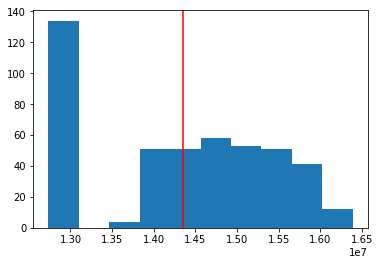

Bin : 12735000,       Frequency = 134
Bin : 13100500,       Frequency = 0
Bin : 13466000,       Frequency = 4
Bin : 13831500,       Frequency = 51
Bin : 14197000,       Frequency = 51
Bin : 14562500,       Frequency = 58
Bin : 14928000,       Frequency = 53
Bin : 15293500,       Frequency = 51
Bin : 15659000,       Frequency = 41
Bin : 16024500,       Frequency = 12
open price에서는 12735000원에서 134회의 최다 빈도를 보이고 있다


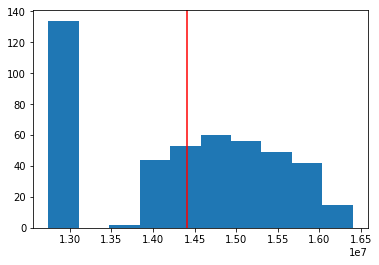

Bin : 12744000,       Frequency = 134
Bin : 13109600,       Frequency = 0
Bin : 13475200,       Frequency = 2
Bin : 13840800,       Frequency = 44
Bin : 14206400,       Frequency = 53
Bin : 14572000,       Frequency = 60
Bin : 14937600,       Frequency = 56
Bin : 15303200,       Frequency = 49
Bin : 15668800,       Frequency = 42
Bin : 16034400,       Frequency = 15
high price에서는 12744000원에서 134회의 최다 빈도를 보이고 있다


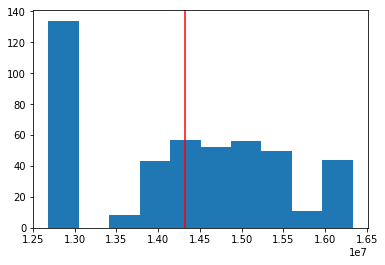

Bin : 12687000,       Frequency = 134
Bin : 13051500,       Frequency = 0
Bin : 13416000,       Frequency = 8
Bin : 13780500,       Frequency = 43
Bin : 14145000,       Frequency = 57
Bin : 14509500,       Frequency = 52
Bin : 14874000,       Frequency = 56
Bin : 15238500,       Frequency = 50
Bin : 15603000,       Frequency = 11
Bin : 15967500,       Frequency = 44
low price에서는 12687000원에서 134회의 최다 빈도를 보이고 있다


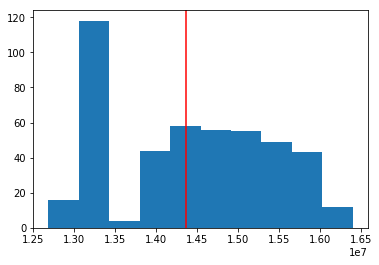

Bin : 12687000,       Frequency = 16
Bin : 13058100,       Frequency = 118
Bin : 13429200,       Frequency = 4
Bin : 13800300,       Frequency = 44
Bin : 14171400,       Frequency = 58
Bin : 14542500,       Frequency = 56
Bin : 14913600,       Frequency = 55
Bin : 15284700,       Frequency = 49
Bin : 15655800,       Frequency = 43
Bin : 16026900,       Frequency = 12
close price에서는 13058100원에서 118회의 최다 빈도를 보이고 있다


In [17]:
price_histogram(bithumb_price, 'open')
price_histogram(bithumb_price, 'high')
price_histogram(bithumb_price, 'low')
price_histogram(bithumb_price, 'close')

**히스토그램 결과 해석**

    - 중심 성향(Central Tendency)
        - "데이터가 평균값을 중심으로 분포되어 있는가?"
            최다빈도가 발생한 가격 구간이 아닌 곳에서 평균값(빨간색 굵은선)이 발생한 것이 아니므로, 이런 경우 '중심 성향이 낮다'고 한다.
    - Modes
        - "하나 이상의 무리가 있는가?"
            Bin : 18004000
            Bin : 18266200
            Bin : 18353600
            이렇게 총 세 개의 무리가 있다.
            
            * 모드란, 
                mode 또는 modal value라고도 부르는데, 주변보다 높은 빈도를 보이는 곳을 말한다. 모드는 하나도 없을 수도 있고, 여러 개의 모드(multi-mode)를 가질 수도 있다. 꼭 최다빈도인 곳을 의미하는 것은 아니다.
                None: 1, 2, 3, 4, 6, 8, 9.
                One mode: (unimodal) 1, 2, 3, 3, 4, 5. (3이 2번의 최다 빈도)
                Two: (bimodal) 1, 1, 2, 3, 4, 4, 5. (1, 4가 2번의 최다 빈도)
                Three: (trimodal) 1, 1, 2, 3, 3, 4, 5, 5. (1, 3, 5가 2번의 최다 빈도)
                More than one (two, three or more) = multimodal.

<http://www.statisticshowto.com/mode/>
              

# 산점도

    2개 변수간의 상관관계를 그린 그래프
    데이터가 여기저기 무작위로 흩어져 있는 형태라면 두 변수간에는 선형관계가 없는 것이다.

/Users/dohk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


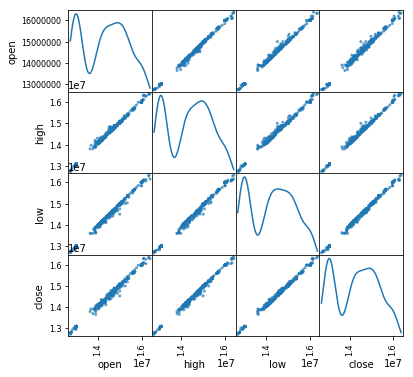

In [18]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(bithumb_price[['open', 'high', 'low', 'close']], alpha=0.7, figsize=(6, 6), diagonal='kde')
plt.show()

    open과 low, close, 
    high와 low, close 등은 곡선관계에 있는 것으로 보인다.
    
    open과 high는 중간 양의 상관 관계에 있는 것으로 보인다.
    
    위 그림의 대각선으로 나타난 그래프는 어떤 변수가 가질 수 있는 값의 범위를 x축으로 하여 해당 값을 가질 확률을 추정할 수 있게 하는 '커널밀도추정(Kernel Density Estimation)'을 그래프로 나타낸 것이다.
    "밀도 추정은 데이터로 부터 변수가 가질 수 있는 모든 값의 밀도(확률)을 추정하는 것"
<https://medium.com/mathpresso/mathpresso-%EB%A8%B8%EC%8B%A0-%EB%9F%AC%EB%8B%9D-%EC%8A%A4%ED%84%B0%EB%94%94-14-%EB%B0%80%EB%8F%84-%EC%B6%94%EC%A0%95-density-estimation-38fd7ef729bb>
    ....
    
    close를 예로 들면, 1825000이상의 값을 가질 확률이 높은 것을 볼 수 있는데, 실제로 close의 가격은 1825000이상의 값들로 이루어져 있다.
    

# 상자그림

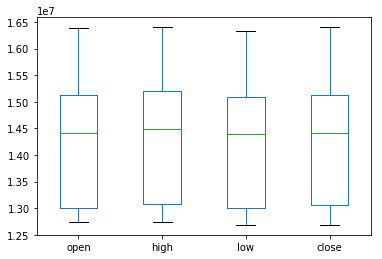

In [19]:
bithumb_price[['open', 'high', 'low', 'close']].plot(kind='box')
plt.show()

    low변수의 값들이 대체로 낮은 값을 가지는 경향을 관찰할 수 있다.
    상자그림으로 이상치도 알 수 있는데, 현재는 보이지 않는다.
    
    위의 상자 그림을 통해서 50%구간에 해당하는 분포의 범위를 파악할 수 있다.(정규분포라는 가정하에). whisker는 상위 24.65%와 하위 24.65%를 나타낸다.

<img src="https://openclipart.org/image/2400px/svg_to_png/244707/Boxplot.png" width=50%></img>


    박스의 크기가 작을수록 데이터들이 median(중앙값)에 몰려있다는 의미
    
 

In [ ]:
f = open(Spark_app_name+'.pickle', 'rb')
poloniex = pickle.load(f)
poloniex

{'close': [15900.2,
  15888.0,
  15820.0,
  15782.4,
  15665.0,
  15666.5,
  15900.0,
  15895.0,
  15960.9,
  15915.0,
  15816.0,
  15784.5,
  16000.0,
  16090.0,
  15890.8,
  15899.8,
  15880.9,
  15879.0,
  15901.5,
  15890.0,
  16000.0,
  15933.2,
  15812.0,
  15600.0,
  15420.0,
  15250.0],
 'date': ['2017-12-14 01:20:00',
  '2017-12-14 01:25:00',
  '2017-12-14 01:30:00',
  '2017-12-14 01:35:00',
  '2017-12-14 01:40:00',
  '2017-12-14 01:45:00',
  '2017-12-14 01:50:00',
  '2017-12-14 01:55:00',
  '2017-12-14 02:00:00',
  '2017-12-14 02:05:00',
  '2017-12-14 02:10:00',
  '2017-12-14 02:15:00',
  '2017-12-14 02:20:00',
  '2017-12-14 02:25:00',
  '2017-12-14 02:30:00',
  '2017-12-14 02:35:00',
  '2017-12-14 02:40:00',
  '2017-12-14 02:45:00',
  '2017-12-14 02:50:00',
  '2017-12-14 02:55:00',
  '2017-12-14 03:00:00',
  '2017-12-14 03:05:00',
  '2017-12-14 03:10:00',
  '2017-12-14 03:15:00',
  '2017-12-14 03:20:00',
  '2017-12-14 03:25:00'],
 'high': [15965.1,
  15983.2,
  15890.1,
  15

In [ ]:
poloniex_price = pd.DataFrame({'open': poloniex['open'], 
                                 'high': poloniex['high'],
                                 'low': poloniex['low'],
                                 'close': poloniex['close']})

# 공분산

    공분산이란, 두 변수의 상관정도를 나타내는 값으로, Cov(x,y)로 표기한다.

In [ ]:
def print_covariance_price(var1, var2, price_type):
    if var1[price_type].cov(var2[price_type]) > 0:
        print("{:8s}과 {:8s}의 {:5s}의 공분산 값은 {:.2f}로서, 양의 방향성을 갖는다.".format("bithumb", "poloniex", price_type, var1[price_type].cov(var2[price_type])))
    elif var1[price_type].cov(var2[price_type]) == 0:
        print("{:8s}과 {:8s}의 {:5s}의 공분산 값은 {:.2f}로서, 방향성이 없다.".format("bithumb", "poloniex", price_type, var1[price_type].cov(var2[price_type])))
    else:
        print("{:8s}과 {:8s}의 {:5s}의 공분산 값은 {:.2f}로서, 음의 방향성을 갖는다.".format("bithumb", "poloniex", price_type, var1[price_type].cov(var2[price_type])))

In [ ]:
print_covariance_price(bithumb_price, poloniex_price, 'open')
print_covariance_price(bithumb_price, poloniex_price, 'high')
print_covariance_price(bithumb_price, poloniex_price, 'low')
print_covariance_price(bithumb_price, poloniex_price, 'close')

bithumb 과 poloniex의 open 의 공분산 값은 1969978.92로서, 양의 방향성을 갖는다.
bithumb 과 poloniex의 high 의 공분산 값은 5953828.92로서, 양의 방향성을 갖는다.
bithumb 과 poloniex의 low  의 공분산 값은 5727288.92로서, 양의 방향성을 갖는다.
bithumb 과 poloniex의 close의 공분산 값은 10592934.00로서, 양의 방향성을 갖는다.


    공분산의 해석에 있어서, 크기가 중요한 것이 아니라 방향성을 나타내는 부호가 중요하다. 
    즉 공분산 값이 하나는 10, 다른 하나는 100이라고 할 때, 수치의 크기가 높다고 상관정도가 더 높다는 걸 의미하진 않는다.

<img src="http://www.statisticshowto.com/wp-content/uploads/2013/12/g-covariance.gif"></img>
- 두 변수 모두 증가하는 관계다.
- 두 변수는 선형적인 관계가 없다. 즉 두 변수는 독립적이다.
- 두 변수 중 하나의 변수가 증가할 때 다른 한 변수는 감소하는 관계다.

# 상관계수

    상관계수는 두 변수의 공분산을 정규화한 것으로서, Cor(x,y)로 나타낸다.
    
    공분산값과는 조금 다르게,
    방향성과 함께 상관정도를 수치로 나타낸다.
   
    

In [ ]:
def print_correlation_price(var1, var2, price_type):
    print("{:8s}과 {:8s}의 {:6s}에 대한 상관계수는 {:1.3f}이다.".format("bithumb", "poloniex", price_type, var1[price_type].corr(var2[price_type])))

In [ ]:
print_correlation_price(bithumb_price, poloniex_price, 'open')
print_correlation_price(bithumb_price, poloniex_price, 'high')
print_correlation_price(bithumb_price, poloniex_price, 'low')
print_correlation_price(bithumb_price, poloniex_price, 'close')

bithumb 과 poloniex의 open  에 대한 상관계수는 0.112이다.
bithumb 과 poloniex의 high  에 대한 상관계수는 0.341이다.
bithumb 과 poloniex의 low   에 대한 상관계수는 0.254이다.
bithumb 과 poloniex의 close 에 대한 상관계수는 0.428이다.


    일반적으로 상관계수의 절대값이 0.3보다 작으면 약한 관계,
    0.7보다 크면 강한 관계다.
    값이 0일 경우 선형적으로 상관관계가 없다.
    
    open값과 low값의 경우, 두 거래소 간에는 약한 양의 상관관계를 가지고 있고
    high값과 closer값의 경우, 두 거래소 간에 어느 정도 뚜렷한 양의 선형관계를 가지고 있다고 할 수 있다.

# 자기상관

/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


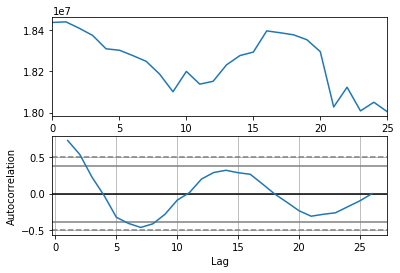

In [ ]:
from pandas.tools.plotting import scatter_matrix, autocorrelation_plot
fig, axs = plt.subplots(2,1)
bithumb_price['close'].plot(ax=axs[0])
autocorrelation_plot(bithumb_price['close'], ax=axs[1])
plt.show()

In [ ]:
bithumb_price['close']

0     18438000.0
1     18441000.0
2     18410000.0
3     18375000.0
4     18310000.0
5     18303000.0
6     18277000.0
7     18249000.0
8     18187000.0
9     18101000.0
10    18200000.0
11    18138000.0
12    18152000.0
13    18232000.0
14    18277000.0
15    18294000.0
16    18397000.0
17    18388000.0
18    18378000.0
19    18354000.0
20    18296000.0
21    18027000.0
22    18123000.0
23    18008000.0
24    18050000.0
25    18004000.0
Name: close, dtype: float64

# 이동평균(Moving Average)
    - 이재원, “고변동 주가 패턴의 감독 학습에 기반한 주식 거래 시스템,” 정보과학회논문지 컴퓨팅의 실제 및 레터 제19권 제1호, 2013, 23-29
    - http://www.dbpia.co.kr/Journal/ArticleDetail/NODE02076177
    

In [ ]:
type(poloniex_price)

pandas.core.frame.DataFrame

In [ ]:
poloniex_price

,close,high,low,open
0,15900.2,15965.1,15710.0,15710.0
1,15888.0,15983.2,15877.0,15902.1
2,15820.0,15890.1,15701.0,15888.0
3,15782.4,15830.2,15705.0,15820.0
4,15665.0,15791.0,15650.0,15782.4
5,15666.5,15779.1,15600.0,15665.0
6,15900.0,15990.1,15650.0,15708.2
7,15895.0,15950.0,15775.9,15900.0
8,15960.9,16000.0,15790.6,15895.0
9,15915.0,15999.0,15915.0,15960.9


In [ ]:
moving_average_poloniex = poloniex_price.rolling(window=5).mean()

In [ ]:
moving_average_poloniex

,close,high,low,open
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,15811.12,15891.92,15728.60,15820.50
5,15764.38,15854.72,15706.60,15811.50
6,15766.78,15856.10,15661.20,15772.72
7,15781.78,15868.08,15676.18,15775.12
8,15817.48,15902.04,15693.30,15790.12
9,15867.48,15943.64,15746.30,15825.82


In [ ]:
# MA5(s,t) - MA5(s,t-1)
moving_average_poloniex.diff()

,close,high,low,open
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,-46.74,-37.20,-22.00,-9.00
6,2.40,1.38,-45.40,-38.78
7,15.00,11.98,14.98,2.40
8,35.70,33.96,17.12,15.00
9,50.00,41.60,53.00,35.70


In [ ]:
Grad = moving_average_poloniex.diff() / moving_average_poloniex
Grad

,close,high,low,open
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,-0.002965,-0.002346,-0.001401,-0.000569
6,0.000152,0.000087,-0.002899,-0.002459
7,0.000950,0.000755,0.000956,0.000152
8,0.002257,0.002136,0.001091,0.000950
9,0.003151,0.002609,0.003366,0.002256


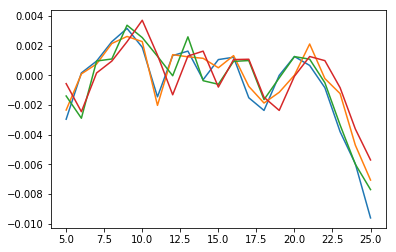

In [ ]:
plt.plot(Grad)
plt.ylim()
plt.show()

# 알고리즘 트레이딩 개요

    알고리즘 트레이딩은 수학적 계산과 IT 시스템을 이용해 금융 상품을 거래하는 것이다.
    알고리즘 트레이딩은 주가의 움직임을 수학적으로 분석하고, 예측할 수 있는 수학적 모델을 만들어 IT 기술로 구현한 것이다.
    설계된 수학적 모델이 과거의 데이터를 이용해 검증했을 때 통계적으로 유의미하다고 판단되는 모델만이 살아남아서 알고리즘 트레이딩으로 구현된다.
    
    2007년부터 알고리즘 트레이딩이 사람이 아닌 기계가 대신하기 시작했다.
    
    수학적 모델이 사람과 비슷하거나 사람보다 더 좋은 결과를 가져올 확률은 94%이다.
    
    사람이 거래하는 전통적인 방식과 수학적 모델에 기반을 둔 알고리즘 트레이딩을 비교했을 때 알고리즘 트레이딩의 장점은 
        - 사람과 비교할 수 없을 정도로 빠른 속도로 거래한다.
        - 수학적 모델에 기반을 두고 결정하기 때문에 감정이 개입되지 않는다.
        
    알고리즘 트레이딩의 부정적인 면은
        - 너무 많은 거래를 발생시켜 시장의 변화를 빠르게 하고 교란시켜 혼란을 줄 수 있다.
        - 어떤 특정 상황에, 비슷한 알고리즘 모델을 사용하는 경우, 대량의 매도 주문이 발생하여 시장을 폭락시킬 가능성이 있다.
        - 프로그램의 오류나 수학적 모델의 실패가 있을 수 있다.
        
    

# 알고리즘 트레이딩 모델

    알파모델(Alpha Model)
        - 시장 평균수익보다 월등한 수익을 내는 모델
    베타모델(Beta Model)
        - 시장 평균과 유사하거나 약간 웃도는 정도의 수익을 내는 모델
        
    
    알고리즘 트레이딩은 알파 모델을 구현하는 것으로 한다. 크게 2가지 접근방법이 있다.
    - Theory-Driven
        - 어떤 모델을 가정하고
          그 모델이 맞는지 틀리는지를 검증하는 방법
        - 모델에 대한 이해도를 높이기 때문에
          알고리즘 트레이딩을 하는 많은 사람들이 선호하는 방식
        - 어떤 가설을 세우고, 이를 기반으로 알파 모델을 만들기 때문에
          모델 설계자의 측면에서 보면
          자신의 모델이 무엇인지, 어떤 변수가 어떻게 영향을 미치는지를 파악할 수 있음
        - Top-down Approach
        
    - Data-Driven
        - 데이터를 분석해 패턴을 찾고
          이를 알파 모델로 만드는 방법
        - 뚜렷한 가설이나 이론적 배경 없이 
          데이터를 분석하면서 지식을 쌓아가는 방식
        - Bottom-up Approach

# 평균회귀 모델

    Theory-Driven의 대표적인 모델에는 평균 회귀 모델이 있다.
    
    평균 회귀 모델의 기본 가정은 다음과 같다.
    - 주어진 시계열 데이터는 과거 데이터의 평균값으로 회귀하려는 경향이 있다.
    - 어떤 변수가 정규분포를 따른다면 평균에 가까운 값이 나올 확률이 높아진다.
        - 즉, 현시점의 주가가 평균주가보다 낮으면 앞으로의 주가는 올라갈 것이고
          반대로 현주가가 평균주가보다 높으면 앞으로의 주가는 내려가는 경향을 보일 것이다
          라고 추정할 수 있음
        
    평균회귀 모델을 적용하려면, 적용하려는 주가 데이터가 랜덤워크인지 아닌지를 파악해야 한다.
    (다른 말로, 정상성(Stationarity)의 특성을 갖는가 아닌가(Non-Stationarity)를 판단하는 것)
    만약 랜덤워크라면, 해당 시계열 데이터는 평균회귀 모델을 적용할 수 없고
    랜덤워크가 아니라면, 평균회귀 모델을 적용할 수 있다.

### 랜덤워크

    - 이전의 사건과 그 다음의 사건이 서로 관련이 없는 것을 말함
    - 이 세계는 어떤 사건이 우연히 발생할 수 있는 특징을 갖는다. 확률적으로 봤을 때 뚜렷한 인과관계가 없는, 해당 사건을 결정짓는 원인이 없다.
    - 복권당첨, 주가의 움직임, 동전 던지기, 액체나 기체 상태의 분자의 운동 등이 그 예

    - 다시 말해, 랜덤워크는 다음 행보가 이전 행보에 영향을 받지 않는 독립적인 사건이라는 것을 의미함
    - 랜덤워크는 방향성이 무작위로 결정되기 때문에 어떤 위치에도 임의적으로 있을 수 있고,
      따라서 분산은 시간이 지남에 따라 증가하는 모습을 보인다.(확률밀도함수가 넓게 퍼지고 높이는 낮은 모습을 보인다.)
    
    - 주가 데이터가 랜덤워크를 보인다는 것은 주가의 흐름이 이전의 데이터와 상관없이 결정된다는 의미이다. --> 평균회귀 모델을 적용할 수 없음
    - 주가 데이터가 평균으로 회귀하려면 이전의 데이터가 현재 데이터에 영향을 미쳐 평균으로 회귀하도록 해야 한다.
    - 즉 데이터들끼리는 비독립적이어야 한다.   
    
    - 평균회귀 모델을 적용할 수 있는 시계열인지 아닌지를 판별하기 위해 사용하는 방법은 다음의 세 가지다.
        - ADF(Augmented Dickey-Fuller) 테스트
        - 허스트 지수(Hurst Exponent)
        - 평균회귀의 Half-life
    
### ADF 테스트

    어떤 주가 데이터가 평균회귀 성질을 갖고 있다면,
    현주가는 다음 주가에 대한 통계적 정보를 포함하고 있어서
    다음 주가가 어떻게 될지를 예측할 수 있게 된다.
    
    현주가가 평균보다 낮다면,
    다음 주가는 위로 향하는 방향성을 가질 확률이 높다.
    
    ADF테스트는 '어떤 시계열 데이터가 랜덤워크를 따른다'는 가설을 세우고,
    이 가설이 참인지 거짓인지를 판단하는 방법이다.
    만약, 참이라면 해당 시계열 데이터는 평균회귀 모델을 적용할 수 없는 시계열 데이터이며
    만약, 거짓이라면 해당 시계열 데이터는 평균회귀 모델을 적용하기 적합한 시계열 데이터이다.
    


In [20]:
import pickle
import statsmodels.tsa.stattools as ts
# from pandas.core import datetools as ts

/Users/dohk/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
dbtable_arg ="TRADE_BTC"
start_time_arg =  '2018-01-18 00:00:00'
end_time_arg =  '2018-01-18 11:59:59'
exchange_arg =  'bithumb'
time_interval_arg = 1
Spark_app_name = coin_type_arg + '_' + exchange_arg + '_' + str(time_interval_arg) + '_' + start_time_arg + '_' + end_time_arg

In [24]:
f = open(Spark_app_name+'.pickle', 'rb')
bithumb = pickle.load(f)
bithumb

bithumb_price = pd.DataFrame({'open': bithumb['open'], 
                                 'high': bithumb['high'],
                                 'low': bithumb['low'],
                                 'close': bithumb['close']})
# bithumb_price

In [25]:
adf_result = ts.adfuller(bithumb_price['close'])
adf_result

(-1.307013354509142,
 0.62595761839247033,
 0,
 454,
 {'1%': -3.4448360329259011,
  '10%': -2.5701721745036776,
  '5%': -2.8679272692747415},
 11501.736330115242)

### adfuller 함수

http://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html?highlight=adfuller#statsmodels.tsa.stattools.adfuller

    statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    
    
    Parameters:
        x : array_like, 1d
            data series
        ...
        
    Returns:	
        adf : float
            Test statistic

        pvalue : float
            MacKinnon’s approximate p-value based on MacKinnon (1994, 2010)

        usedlag : int
            Number of lags used

        nobs : int
            Number of observations used for the ADF regression and calculation of the critical values

        critical values : dict
            Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010)

        icbest : float
            The maximized information criterion if autolag is not None.

        resstore : ResultStore, optional
            A dummy class with results attached as attributes

**실행결과**

(-1.307013354509142,
 0.62595761839247033,
 0,
 454,
 {'1%': -3.4448360329259011,
  '10%': -2.5701721745036776,
  '5%': -2.8679272692747415},
 11501.736330115242)
 
 
>(-1.307013354509142, : 가설 통계량(Test Statistic)<br>
> 0.62595761839247033,<br>
> 0,<br>
> 454,<br>
> {'1%': -3.4448360329259011, : 1% 기각값(Critical Value)<br>
>  '10%': -2.5701721745036776, : 10% 기각값(Critical Value)<br>
>  '5%': -2.8679272692747415}, : 5% 기각값(Critical Value)<br>
> 11501.736330115242)

    가설을 기각해야 해당 시계열 데이터가 평균회귀 모델에 적합하다고 할 수 있다.
    그러기 위해 검정 통계량 값이 1%, 5%, 10% 기각값 중 어느 하나보다도 작아야 한다.
    
    현재 2018/01/18 00:00:00부터 2018/01/18 11:59:59까지의 bithumb거래소의 BTC코인 데이터 중 close 데이터는 
    검정 통계량은 -1.307로서 어느 기각값보다도 작지 않으므로 가설을 기각할 수 없다.
    결론적으로 위 시계열 데이터는 평균회귀 모델을 적용할 수 없는 모델이다.
    
    대부분의 주가 데이터는 랜덤워크다.
    평균회귀는 단지 예로 든 것

In [19]:
adf_result_o = ts.adfuller(bithumb_price['open'])
adf_result_o

(-2.088081975286701,
 0.24933382476908794,
 6,
 19,
 {'1%': -3.8326031418574136,
  '10%': -2.6555195844875348,
  '5%': -3.0312271701414204},
 402.42121420219257)

In [21]:
adf_result_h = ts.adfuller(bithumb_price['high'])
adf_result_h

(-3.0427564114270145,
 0.0310898534216471,
 4,
 21,
 {'1%': -3.7883858816542486,
  '10%': -2.6463967573696143,
  '5%': -3.0130977475434619},
 403.11828877114152)

In [22]:
adf_result_l = ts.adfuller(bithumb_price['low'])
adf_result_l

(-0.94538201654211429,
 0.7726605013462744,
 9,
 16,
 {'1%': -3.9240193847656246,
  '10%': -2.6738926562500001,
  '5%': -3.0684982031250003},
 415.20693802690789)

# 평균회귀 모델 구현 개요

    평균 회귀 모델의 기본 개념은 
    주가가 평균보다 낮으면 주식을 매입하고
    반대로 평균보다 높으면 주식을 매도해 수익을 만드는 것이다.
    
    평균 회귀 모델을 완성하려면 다음의 3가지 사항을 결정해야 한다.
    - 평균 정의
        주가 매도, 주가 매수의 비교치로 사용될 평균을 어떻게 구할지를 정해야 한다.
        평균은 매도, 매수를 알려주는 일종의 신호로 활용된다.
        예를 들면, 10일치의 이동평균, 30일치의 이동평균 등으로 평균을 정할 수 있다.
    - 매도, 매수 기준
        주가가 평균보다 높아지는 순간에 매도할지,
        아니면 평균과 주가의 차이가 2배 이상 될 때 매도할지 등의
        매도, 매수의 기준을 결정해야 한다.
        간단히 선택하기 힘든 문제.
        
        기준이 너무 낮으면 큰 이익을 보지 못하고
        기준이 너무 높으면 매도나 매수 시기를 놓치게 된다.
        확률적으로 표준편차의 값을 기준으로 선택하는 것이 안전하다.
<img src="https://goo.gl/XkApWD" width="50%"></img>
        
        이동평균과 주가의 차이가 표준편차보다 크면 매도나 매수를 실행한다.
        - | 주가 - 이동평균 | > sigma
            -    매도: 주가 - 이동평균 > 0
            -    매수: 주가 - 이동평균 < 0
        
    - 데이터 선택
        트레이딩에 사용할 데이터를 선택하는 것.
        종가를 사용할지 시가를 사용할지 등을 선택한다.
        간단히 선택하기 힘든 문제.
        
**슈도코드**

    price_moving_average = rolling_mean(종가,10)
    price_standard_deviation = rolling_std(종가,10)
    diff = price - price_moving_average
    if |diff| > price_standard_deviation :
        if diff > 0:
            sell_stock()
        else:
            buy_stock()



# 머신러닝 모델

    평균회귀 모델이 가설을 세우고 가설에 맞는 모델을 완성해 나가는 과정이라면
    머신러닝 모델은 특별한 이론 없이 데이터로부터 모델을 생성해나가는 것이다.
    
    머신러닝에서 가장 중요한 것은 머신러닝 알고리즘이나 컴퓨팅 파워가 아닌 데이터인데, 
    특히 입력변수로 무엇을 선정할지를 고민해야 한다.
    출력변수에 영향을 미치는 입력변수가 많을수록 예측력이 높지만, 반드시 많다고 좋은 것은 아니다.
    
    알고리즘 트레이딩에서 사용할 수 있는 입력변수의 예에 대하여 책에서는 다음과 같이 제시된다.
    
    - 주가 데이터
    - 거래량 데이터
    - 지수 데이터
    - 외부 데이터
        - 환율, 뉴스 데이터 등
    - 기업 데이터
        - 매출액, 영업이익률 등
        
# 회귀냐, 분류냐

    머신러닝을 이용해 주가 자체를 예측하려 한다면 회귀 문제로 정의해야 하고
    주가의 방향이 오를지 내릴지를 알고 싶다면 분류 문제로 정의해야 한다.
    
    주가는 랜덤워크이기 때문에
    미래의 주가가 현재의 주가에 영향을 받지 않는 독립적인 관계에 있다.
    따라서 주가가 상승하거나 하락할 확률은 50%로서 동전 던지기 처럼 오르냐 내리냐의 분류 문제로 정의할 수 있다.
    이 책에서는 그래서 분류로 모델을 만들고자 한다.
    
    